In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
yellow_trips = pd.read_parquet('sources\yellow_tripdata_2024-01.parquet')
green_trips = pd.read_parquet('sources\green_tripdata_2024-01.parquet')
fhv_trips = pd.read_parquet('sources\\fhv_tripdata_2024-01.parquet')

**2. Revisión de Valores Nulos y Tipos de Datos**

In [10]:
# Valores nulos
print(yellow_trips.isnull().sum())
print(green_trips.isnull().sum())
print(fhv_trips.isnull().sum())

# Tipos de datos
print(yellow_trips.dtypes)
print(green_trips.dtypes)
print(fhv_trips.dtypes)

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64
VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type      

**Manejo de Valores Nulos**

*Yellow Trips:*

passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge, y Airport_fee tienen un número considerable de valores nulos.
Podríamos imputar valores, eliminar registros nulos, o considerar estas variables como no críticas si los valores nulos son significativos.

*Green Trips:*

Similar a Yellow Trips, las columnas passenger_count, RatecodeID, store_and_fwd_flag, ehail_fee, y congestion_surcharge tienen valores nulos.
Evaluar si la imputación o eliminación de estos datos afectará el análisis.

*FHV:*

PUlocationID, DOlocationID, y SR_Flag tienen una gran cantidad de valores nulos.
Decidir cómo manejar estos nulos, especialmente si afectan el análisis espacial o de tipo de viaje.

In [13]:
# Decisión basada en el análisis
yellow_trips = yellow_trips.dropna(subset=['passenger_count', 'RatecodeID'])
green_trips = green_trips.dropna(subset=['passenger_count', 'RatecodeID','trip_type'])
fhv_trips = fhv_trips.dropna(subset=['PUlocationID', 'DOlocationID'])


fhv_trips = fhv_trips.fillna({'SR_Flag': 0})
green_trips = green_trips.drop(columns=['ehail_fee'])


In [ ]:
yellow_trips

**3. Estadísticas Descriptivas**

In [14]:
# Estadísticas descriptivas
print(yellow_trips.describe())
print(green_trips.describe())
print(fhv_trips.describe())


           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  2.824462e+06                     2824462                     2824462   
mean   1.758794e+00  2024-01-17 01:05:51.479761  2024-01-17 01:21:27.433029   
min    1.000000e+00         2002-12-31 22:59:39         2002-12-31 23:05:41   
25%    2.000000e+00         2024-01-09 15:31:44  2024-01-09 15:48:48.250000   
50%    2.000000e+00         2024-01-17 10:36:41         2024-01-17 10:55:22   
75%    2.000000e+00         2024-01-24 18:44:19         2024-01-24 18:59:22   
max    2.000000e+00         2024-02-01 00:01:15         2024-02-02 13:56:52   
std    4.278150e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     2.824462e+06   2.824462e+06  2.824462e+06  2.824462e+06   
mean      1.339281e+00   3.254071e+00  2.069359e+00  1.662218e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.

Limpieza de Datos: Sería necesario limpiar y corregir estos valores atípicos y negativos para asegurar que el análisis sea preciso. Esto podría incluir la eliminación de filas con fechas claramente incorrectas, el reemplazo de valores negativos con nulos o valores estimados, y la eliminación de outliers excesivos.

Verificación de Rangos Temporales: Asegúrate de que los datos estén dentro del rango temporal correcto y de que las fechas no tengan inconsistencias que puedan afectar el análisis.

In [16]:
# convertir valores negativos a positivos solo en columnas específicas
columnas_a_convertir = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge']

for col in columnas_a_convertir:
    yellow_trips[col] = yellow_trips[col].abs()
    green_trips[col] = green_trips[col].abs()
    # df_fhv no tiene estas columnas, por lo que no es necesario en este caso.

yellow_trips['Airport_fee'] = yellow_trips['Airport_fee'].abs()
green_trips['improvement_surcharge'] = green_trips['improvement_surcharge'].abs()

**4. Distribución de Viajes por Ubicación**

* Identificar las Columnas Relevantes: Nos enfocaremos en las columnas PUlocationID (Pick-Up Location ID) y DOlocationID (Drop-Off Location ID) para los viajes de Yellow Trips, Green Trips y FHV. Estas columnas contienen los identificadores de las ubicaciones de origen y destino de los viajes.

* Distribución de Viajes por Ubicación:

Contar la cantidad de viajes que comenzaron (PUlocationID) y terminaron (DOlocationID) en cada ubicación.
Crear visualizaciones para mostrar cómo se distribuyen los viajes en las distintas ubicaciones.

**YELLOW_TRIPS**

In [22]:
import numpy as np

# Definir los intervalos para agrupar las locationID
bins = np.arange(0, yellow_trips['PULocationID'].max() + 50, 50)  # Intervalos de 50 unidades
labels = [f'{i}-{i+49}' for i in bins[:-1]]  # Etiquetas para los intervalos


In [24]:
# Agrupar y contar por intervalos para PUlocationID
pu_yellow_binned = pd.cut(yellow_trips['PULocationID'], bins=bins, labels=labels)
pu_yellow_counts_binned = pu_yellow_binned.value_counts().sort_index()

# Agrupar y contar por intervalos para DOlocationID
do_yellow_binned = pd.cut(yellow_trips['DOLocationID'], bins=bins, labels=labels)
do_yellow_counts_binned = do_yellow_binned.value_counts().sort_index()


C:\Users\david\AppData\Local\Temp\ipykernel_7232\3667632143.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pu_yellow_counts_binned.index, y=pu_yellow_counts_binned.values, palette='viridis')


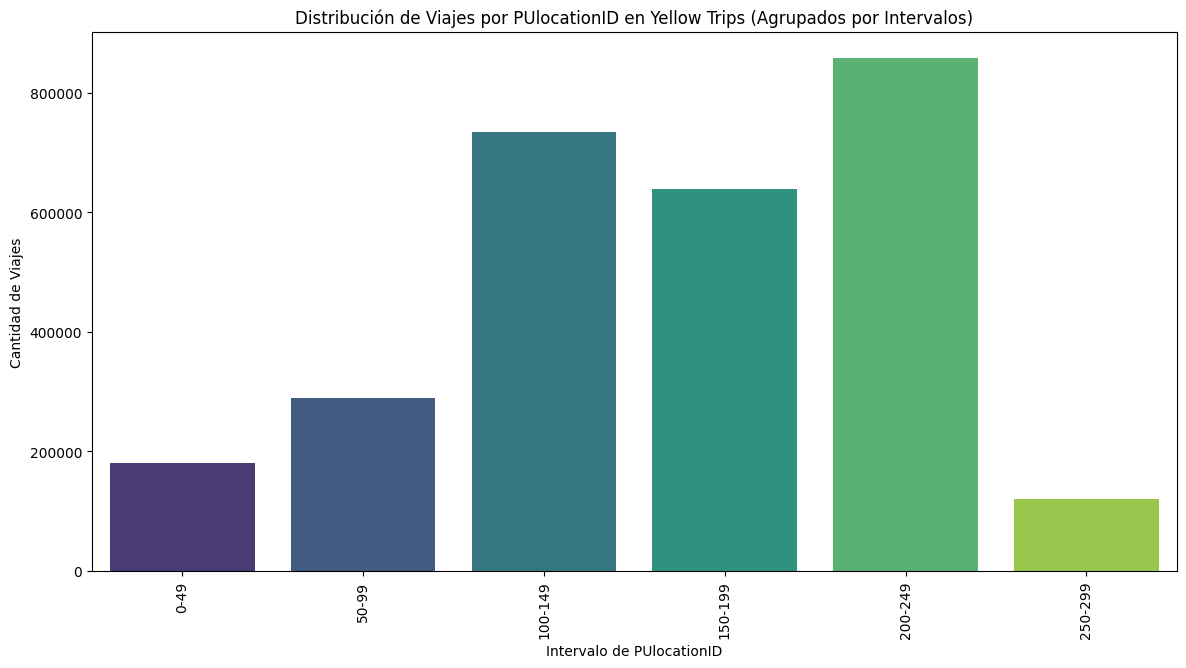

C:\Users\david\AppData\Local\Temp\ipykernel_7232\3667632143.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=do_yellow_counts_binned.index, y=do_yellow_counts_binned.values, palette='plasma')


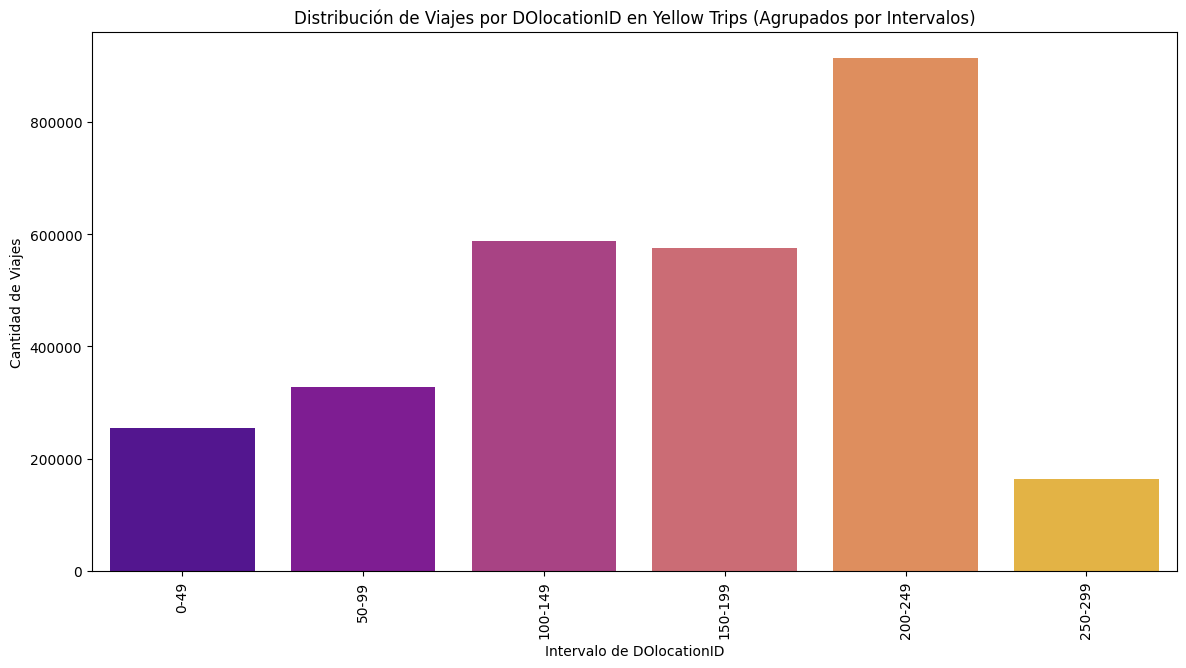

In [25]:
# Visualización de la distribución por intervalos de PUlocationID
plt.figure(figsize=(14, 7))
sns.barplot(x=pu_yellow_counts_binned.index, y=pu_yellow_counts_binned.values, palette='viridis')
plt.title('Distribución de Viajes por PUlocationID en Yellow Trips (Agrupados por Intervalos)')
plt.xlabel('Intervalo de PUlocationID')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=90)
plt.show()

# Visualización de la distribución por intervalos de DOlocationID
plt.figure(figsize=(14, 7))
sns.barplot(x=do_yellow_counts_binned.index, y=do_yellow_counts_binned.values, palette='plasma')
plt.title('Distribución de Viajes por DOlocationID en Yellow Trips (Agrupados por Intervalos)')
plt.xlabel('Intervalo de DOlocationID')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=90)
plt.show()

**GREEN_TRIPS**

In [27]:
import numpy as np

# Definir los intervalos para agrupar las locationID
bins = np.arange(0, green_trips['PULocationID'].max() + 50, 50)  # Intervalos de 50 unidades
labels = [f'{i}-{i+49}' for i in bins[:-1]]  # Etiquetas para los intervalos


In [28]:
# Agrupar y contar por intervalos para PUlocationID
pu_green_binned = pd.cut(green_trips['PULocationID'], bins=bins, labels=labels)
pu_green_counts_binned = pu_green_binned.value_counts().sort_index()

# Agrupar y contar por intervalos para DOlocationID
do_green_binned = pd.cut(green_trips['DOLocationID'], bins=bins, labels=labels)
do_green_counts_binned = do_green_binned.value_counts().sort_index()

C:\Users\david\AppData\Local\Temp\ipykernel_7232\374872757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pu_green_counts_binned.index, y=pu_green_counts_binned.values, palette='viridis')


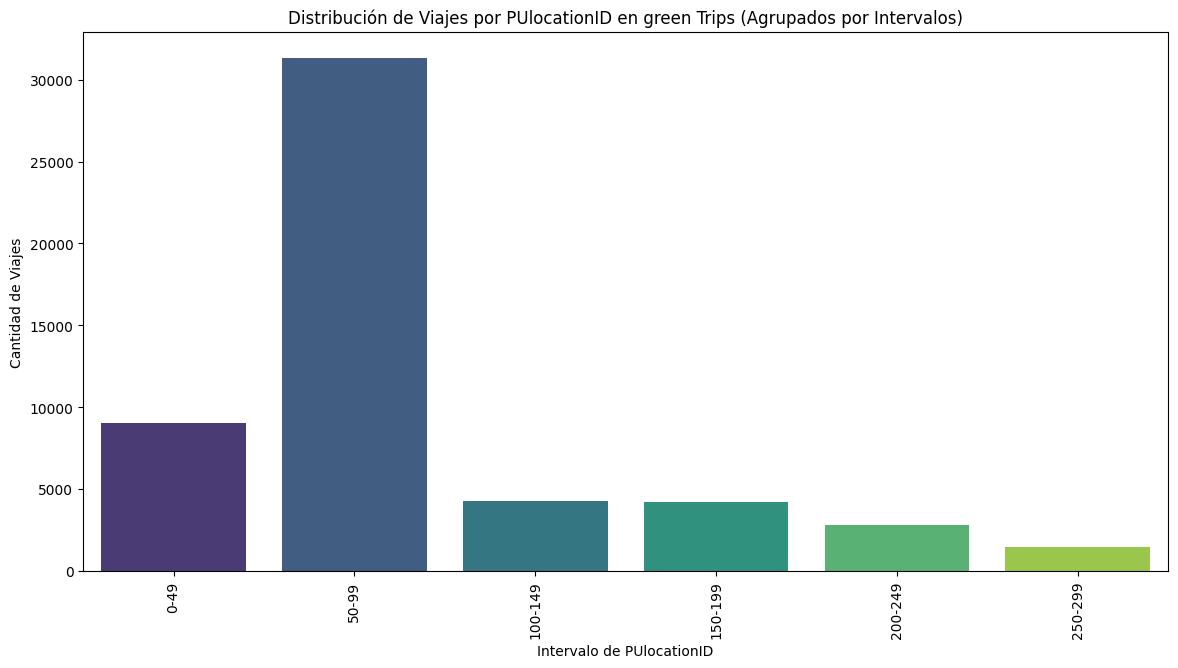

C:\Users\david\AppData\Local\Temp\ipykernel_7232\374872757.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=do_green_counts_binned.index, y=do_green_counts_binned.values, palette='plasma')


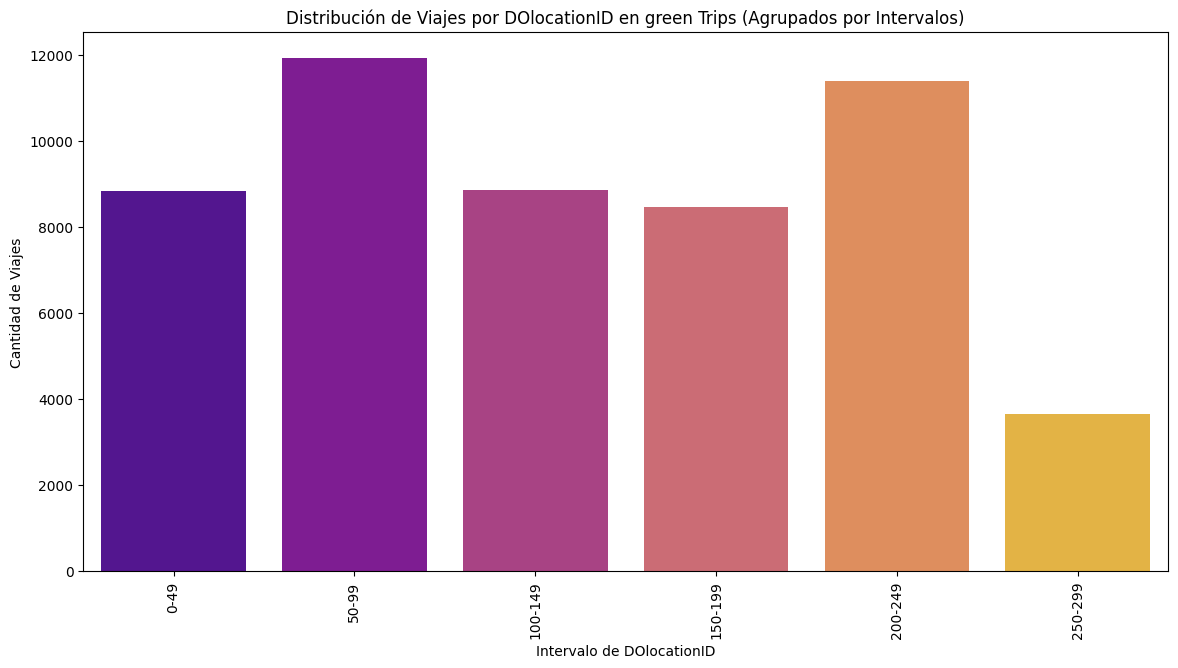

In [29]:
# Visualización de la distribución por intervalos de PUlocationID
plt.figure(figsize=(14, 7))
sns.barplot(x=pu_green_counts_binned.index, y=pu_green_counts_binned.values, palette='viridis')
plt.title('Distribución de Viajes por PUlocationID en green Trips (Agrupados por Intervalos)')
plt.xlabel('Intervalo de PUlocationID')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=90)
plt.show()

# Visualización de la distribución por intervalos de DOlocationID
plt.figure(figsize=(14, 7))
sns.barplot(x=do_green_counts_binned.index, y=do_green_counts_binned.values, palette='plasma')
plt.title('Distribución de Viajes por DOlocationID en green Trips (Agrupados por Intervalos)')
plt.xlabel('Intervalo de DOlocationID')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=90)
plt.show()